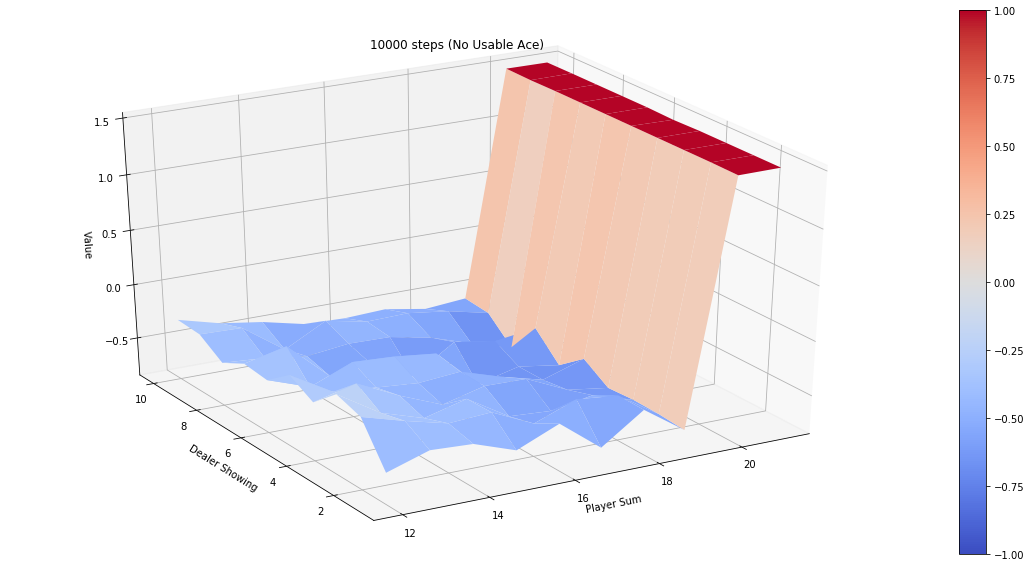

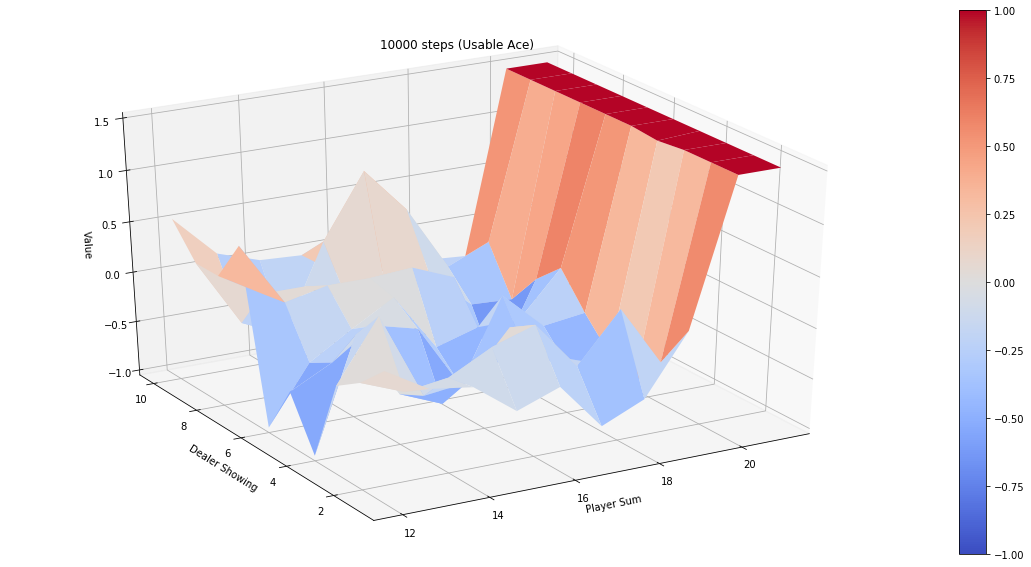

In [1]:
from blackjack_env1 import blackjack_env
from collections import defaultdict
env = blackjack_env()

def policy(state):
    score, dealer_score, usable_ace = state
    return 0 if score >= 20 else 1


num_episodes = 10000
discount_factor=1.0
returns_sum = defaultdict(float)
returns_count = defaultdict(float)

# the final value function
V = defaultdict(float)

for i_episode in range(1, num_episodes+1):
    episode = []
    state = env.reset()
    for t in range(200):
        action = policy(state)
        next_state, reward, done= env.step(action)
        episode.append((state, action, reward))
        if done:
            break
        state = next_state
        
    states_in_episode = set([tuple(x[0]) for x in episode])
    for state in states_in_episode:
        # Find the first occurance of the state in the episode
        first_occurence_idx = next(i for i, x in enumerate(episode) if x[0] == state)
        G = sum([x[2]*(discount_factor**i) for i, x in enumerate(episode[first_occurence_idx:])])
        
        returns_sum[state] += G
        returns_count[state] += 1.0
        V[state] = returns_sum[state] / returns_count[state]
        

import plotting 
plotting.plot_value_function(V, title="10000 steps")